# 🎯 Parte 2: Teorema del Limite Centrale

**Obiettivo**: Dimostrare numericamente il CLT.

## Argomenti:
3. Medie di RV e scaling σ/√n
4. Rinormalizzazione 
5. CLT universale

In [2]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 💡 Nuove funzioni per il CLT: Generatori casuali avanzati

=== 1. DISTRIBUZIONE UNIFORME (Dado) ===
Dado uniforme: media=3.457, primi 10: [4 5 3 5 5 2 3 3 3 5]

=== 2. DISTRIBUZIONE BERNOULLI ===
Bernoulli (p=0.3): media=0.294, primi 10: [0 0 0 0 0 0 0 1 0 0]

=== 3. DISTRIBUZIONE ESPONENZIALE ===
Esponenziale (λ=0.5): media=1.986, primi 5: [9.69652653 3.81333023 0.46767737 5.33559892 0.24742556]

=== 4. DISTRIBUZIONE NORMALE (Gaussiana) ===
Normale (μ=5,σ=2): media=5.010, primi 5: [1.89248247 6.63577932 5.75281905 3.19589689 3.26067384]

=== 5. VISUALIZZAZIONE DELLE 4 DISTRIBUZIONI ===


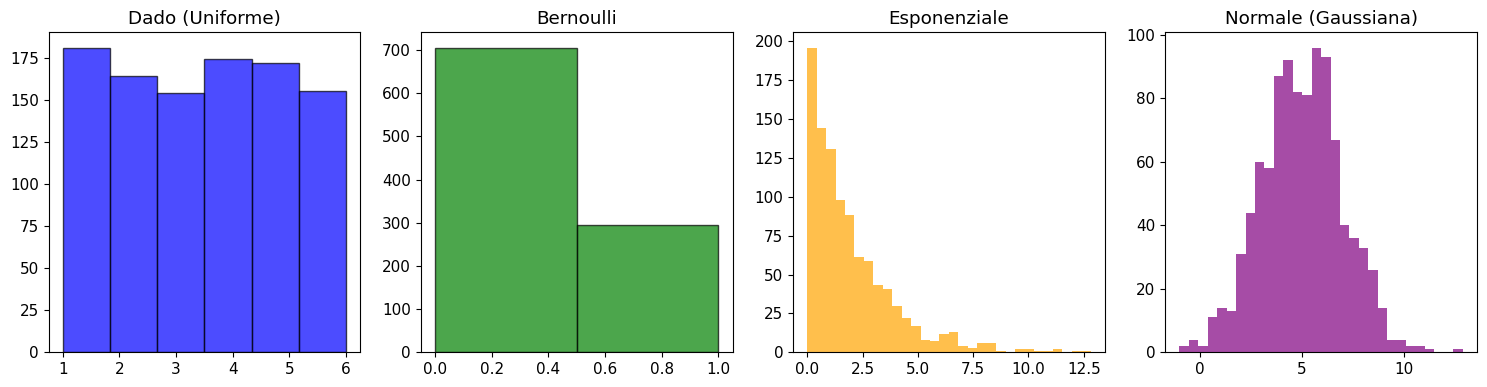

✅ Quattro distribuzioni TEORICHE molto diverse!
🎯 Obiettivo CLT: Dimostrare che le loro MEDIE convergono alla Gaussiana standardizzata!
💡 Vantaggi: Nessun bias da campioni finiti, parametri matematici esatti!


In [3]:
# 🎲 GENERATORI DI DISTRIBUZIONI TEORICHE per il CLT

print("=== 1. DISTRIBUZIONE UNIFORME (Dado) ===")
# Generazione diretta: ogni valore ha stessa probabilità
dado_teorico = np.random.randint(1, 7, 1000)  # Genera direttamente
print(f"Dado uniforme: media={np.mean(dado_teorico):.3f}, primi 10: {dado_teorico[:10]}")

print(f"\n=== 2. DISTRIBUZIONE BERNOULLI ===")
# Binomiale/Bernoulli (successo/fallimento)
bernoulli = np.random.binomial(1, 0.3, 1000)  # 1000 lanci, prob=0.3
print(f"Bernoulli (p=0.3): media={np.mean(bernoulli):.3f}, primi 10: {bernoulli[:10]}")

print(f"\n=== 3. DISTRIBUZIONE ESPONENZIALE ===")
# Esponenziale (tempi di attesa, decadimento)
esponenziale = np.random.exponential(scale=2, size=1000)  # λ=1/2
print(f"Esponenziale (λ=0.5): media={np.mean(esponenziale):.3f}, primi 5: {esponenziale[:5]}")

print(f"\n=== 4. DISTRIBUZIONE NORMALE (Gaussiana) ===")
# Normale (la famosa Gaussiana)
normale = np.random.normal(loc=5, scale=2, size=1000)  # μ=5, σ=2
print(f"Normale (μ=5,σ=2): media={np.mean(normale):.3f}, primi 5: {normale[:5]}")

print(f"\n=== 5. VISUALIZZAZIONE DELLE 4 DISTRIBUZIONI ===")
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Plot delle 4 distribuzioni teoriche
axes[0].hist(dado_teorico, bins=6, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Dado (Uniforme)')

axes[1].hist(bernoulli, bins=2, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Bernoulli')

axes[2].hist(esponenziale, bins=30, alpha=0.7, color='orange')
axes[2].set_title('Esponenziale')

axes[3].hist(normale, bins=30, alpha=0.7, color='purple')
axes[3].set_title('Normale (Gaussiana)')

plt.tight_layout()
plt.show()

print("✅ Quattro distribuzioni TEORICHE molto diverse!")
print("🎯 Obiettivo CLT: Dimostrare che le loro MEDIE convergono alla Gaussiana standardizzata!")
print("💡 Vantaggi: Nessun bias da campioni finiti, parametri matematici esatti!")

### 🔬 Funzioni chiave che useremo:

**Per generare distribuzioni:**
- `np.random.binomial(n, p, size)` → Bernoulli/Binomiale  
- `np.random.exponential(scale, size)` → Esponenziale (decay radioattivo)
- `np.random.normal(loc, scale, size)` → Gaussiana (errori di misura)

**Per analisi:**
- `np.mean(array)` → Media (momento primo)
- `np.std(array)` → Deviazione standard  
- `np.var(array)` → Varianza

**Parametri da ricordare:**
- `size` = quanti numeri generare
- `replace=True` = rimetti il numero dopo averlo pescato (importante!)

💡 **Prossimo passo**: Vedere come le MEDIE di questi numeri si comportano! 🎯

## 3. Medie di RV: Scaling σ/√n

In [4]:
# Funzione intelligente per CLT - genera direttamente dalla distribuzione
def calcola_medie_campioni_teorici(dist_func, n_campioni=1000, dimensione_campione=30):
    """
    Genera medie campionarie da una distribuzione teorica
    dist_func: funzione che genera campioni (es. lambda: np.random.exponential(2, dimensione_campione))
    """
    medie = []
    for i in range(n_campioni):
        campione = dist_func(dimensione_campione)  # Genera direttamente dalla distribuzione
        medie.append(np.mean(campione))
    return np.array(medie)

# Funzione legacy per compatibilità (manteniamo per esempi didattici)
def calcola_medie_campioni(popolazione, n_campioni=1000, dimensione_campione=30):
    medie = []
    for i in range(n_campioni):
        campione = np.random.choice(popolazione, dimensione_campione, replace=True)
        medie.append(np.mean(campione))
    return np.array(medie)

print("🎯 Setup CLT completato con funzioni teoriche!")

🎯 Setup CLT completato con funzioni teoriche!


Esponenziale teorica: μ = 2, σ = 2


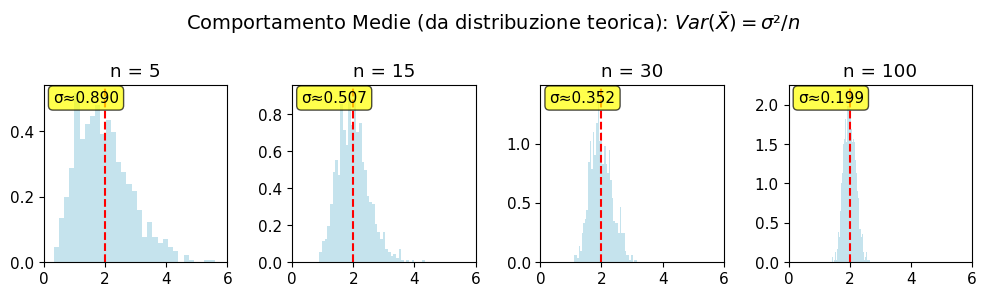

🎯 Con distribuzioni teoriche: nessun bias da campioni finiti!


In [5]:
# Distribuzioni teoriche (più robuste!)
np.random.seed(42)

# Parametri teorici esponenziale: E[X] = scale, Var[X] = scale²
scale_exp = 2
mu_teorico = scale_exp      # Media teorica
sigma_teorico = scale_exp   # Std teorica

print(f"Esponenziale teorica: μ = {mu_teorico}, σ = {sigma_teorico}")

# Funzione generatrice esponenziale
def gen_esponenziale(n):
    return np.random.exponential(scale_exp, n)

# Test scaling con diverse dimensioni
dimensioni = [5, 15, 30, 100]
fig, axes = plt.subplots(1, len(dimensioni), figsize=(10, 3))

for i, n in enumerate(dimensioni):
    # Usa distribuzione teorica (no bias da campione finito!)
    medie_campioni = calcola_medie_campioni_teorici(gen_esponenziale, 1000, n)
    std_empirica = np.std(medie_campioni)
    std_teorica = sigma_teorico / np.sqrt(n)
    
    # Istogramma medie
    axes[i].hist(medie_campioni, bins=40, density=True, alpha=0.7, color='lightblue')
    axes[i].set_title(f'n = {n}')
    axes[i].axvline(mu_teorico, color='red', linestyle='--', label=f'μ={mu_teorico}')
    axes[i].set_xlim(0, 6)
    
    # Mostra convergenza teorica
    axes[i].text(0.05, 0.9, f'σ≈{std_empirica:.3f}', transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.suptitle('Comportamento Medie (da distribuzione teorica): ' +r'$Var(\bar{X}) = σ²/n$', fontsize=14)
plt.tight_layout()
plt.show()

print(f"🎯 Con distribuzioni teoriche: nessun bias da campioni finiti!")

In [6]:
# Confronta std empirica e teorica

### Matematica: Var(X̄) = σ²/n

Se $X_1, X_2, \ldots, X_n$ indipendenti con $\text{Var}(X_i) = \sigma^2$:

$$\text{Var}(\bar{X}_n) = \text{Var}\left(\frac{1}{n}\sum_{i=1}^{n} X_i\right) = \frac{\sigma^2}{n}$$

**Problema**: Per $n \to \infty$, $\text{Var}(\bar{X}_n) \to 0$ → distribuzione degenere!

## 4. Rinormalizzazione: La Soluzione

### Formula CLT:
$$Z_n = \frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} \mathcal{N}(0,1)$$

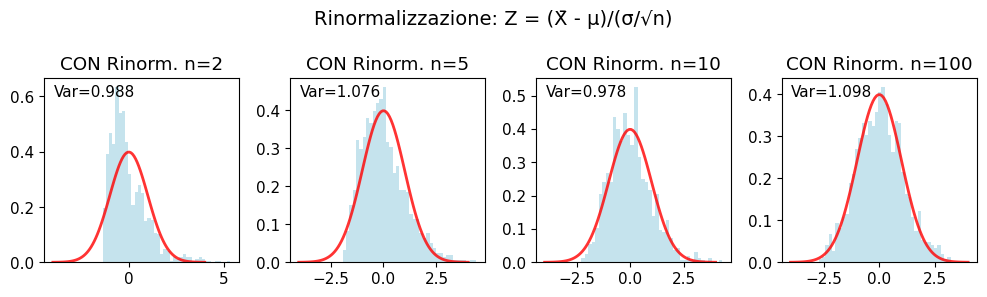

✅ Con rinormalizzazione: Var ≈ 1, forma → N(0,1)
❌ Senza: Var → 0, distribuzione collassa


In [7]:
# Confronto: Con rinormalizzazione (usando distribuzione teorica!)
dimensioni = [2, 5, 10, 100]
fig, axes = plt.subplots(1, len(dimensioni), figsize=(10, 3))

for i, n in enumerate(dimensioni):
    # Usa distribuzione teorica esponenziale (no bias!)
    medie = calcola_medie_campioni_teorici(gen_esponenziale, 1000, n)
    
    # CON rinormalizzazione
    Z_scores = (medie - mu_teorico) / (sigma_teorico / np.sqrt(n))
    axes[i].hist(Z_scores, bins=40, density=True, alpha=0.7, color='lightblue')
    axes[i].set_title(f'CON Rinorm. n={n}')
    
    # Normale N(0,1) teorica
    x = np.linspace(-4, 4, 100)
    normale = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
    axes[i].plot(x, normale, 'r-', linewidth=2, alpha=0.8)
    
    var_con = np.var(Z_scores)
    axes[i].text(0.05, 0.9, f'Var={var_con:.3f}', transform=axes[i].transAxes)

plt.suptitle('Rinormalizzazione: Z = (X̄ - μ)/(σ/√n)', fontsize=14)
plt.tight_layout()
plt.show()

print("✅ Con rinormalizzazione: Var ≈ 1, forma → N(0,1)")
print("❌ Senza: Var → 0, distribuzione collassa")

## 5. CLT Universale

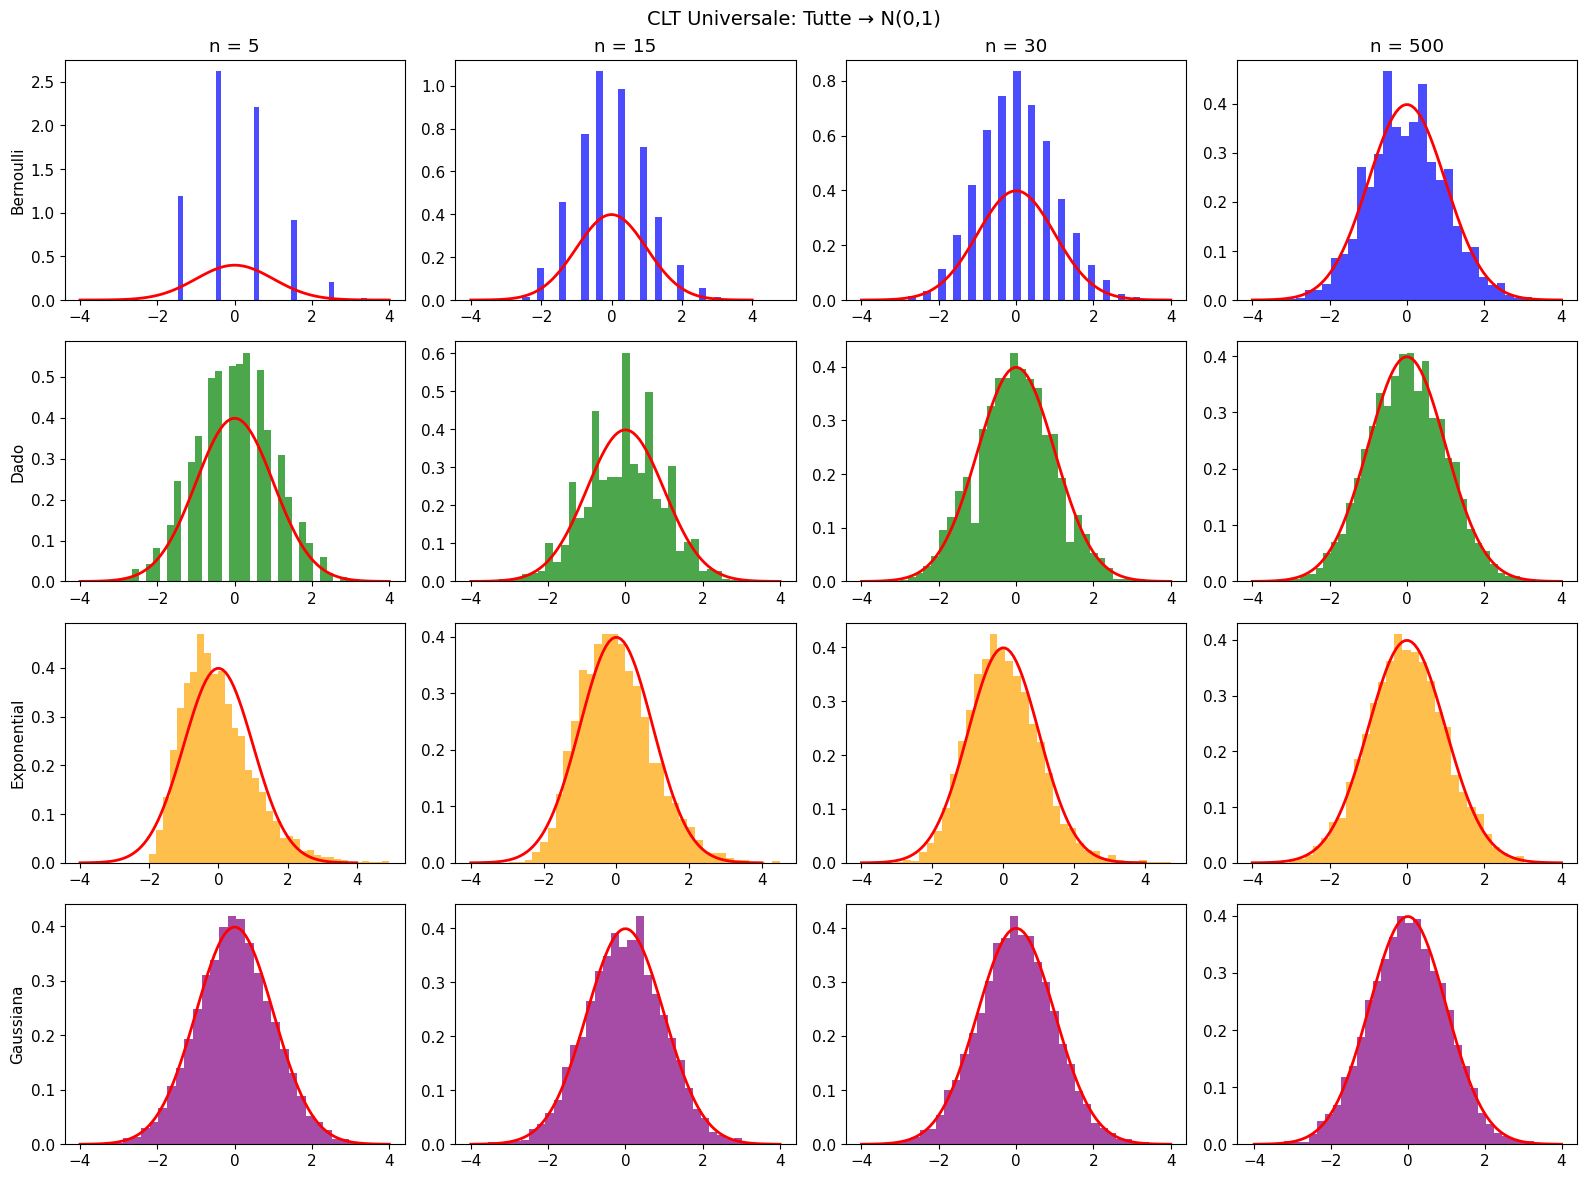

🌟 TUTTE le distribuzioni convergono a N(0,1)!
📊 Nota: Anche la Gaussiana (già normale) converge a N(0,1) standardizzata!


In [8]:
# Test su 4 distribuzioni diverse (tutte teoriche!)
np.random.seed(123)

# Definizione funzioni generatrici teoriche
def gen_bernoulli(n): return np.random.binomial(1, 0.3, n)
def gen_dado(n): return np.random.randint(1, 7, n)  
def gen_exp_univ(n): return np.random.exponential(1, n)
def gen_gauss(n): return np.random.normal(5, 2, n)

# Parametri teorici (senza bias da campioni finiti!)
distribuzioni_teoriche = [
    (gen_bernoulli, 0.3, np.sqrt(0.3*0.7), "Bernoulli", "blue"),      # μ=p, σ=√(p(1-p))
    (gen_dado, 3.5, np.sqrt(35/12), "Dado", "green"),                 # μ=3.5, σ=√(35/12)
    (gen_exp_univ, 1.0, 1.0, "Exponential", "orange"),                # μ=λ, σ=λ
    (gen_gauss, 5.0, 2.0, "Gaussiana", "purple")                      # μ=5, σ=2
]

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
dimensioni = [5, 15, 30, 500]

for row, (gen_func, mu_teo, sigma_teo, nome, colore) in enumerate(distribuzioni_teoriche):
    for col, n in enumerate(dimensioni):
        # Usa distribuzione teorica (no bias!)
        medie = calcola_medie_campioni_teorici(gen_func, 5000, n)
        Z = (medie - mu_teo) / (sigma_teo / np.sqrt(n))
        
        axes[row, col].hist(Z, bins=35, density=True, alpha=0.7, color=colore)
        
        # N(0,1) teorica
        x = np.linspace(-4, 4, 100)
        axes[row, col].plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2), 'r-', linewidth=2)
        
        if row == 0:
            axes[row, col].set_title(f'n = {n}')
        if col == 0:
            axes[row, col].set_ylabel(nome)

plt.suptitle('CLT Universale: Tutte → N(0,1)', fontsize=14)
plt.tight_layout()
plt.show()

print("🌟 TUTTE le distribuzioni convergono a N(0,1)!")
print("📊 Nota: Anche la Gaussiana (già normale) converge a N(0,1) standardizzata!")

---
## 🎯 Conclusione

**CLT**: Indipendentemente dalla distribuzione originale, le medie rinormalizzate convergono a $\mathcal{N}(0,1)$.

**Chiavi**:
- Scaling: $\text{Var}(\bar{X}) = \sigma^2/n$
- Rinormalizzazione: $Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$
- Universalità


# Esercizio 1)

**Perché la media di un campione estratto da una variabile casuale gaussiana è ancora una variabile casuale gaussiana?**

> Rifletti sulle proprietà della distribuzione normale: Qual è la ragione matematica di questa "stabilità" della forma della distribuzione? 


# Esercizio 2)


**Ripeti l'esperimento del CLT usando una variabile casuale t-Student:**

1. Genera molti campioni dalla distribuzione t-Student, per diversi valori di df dati da [2,5,...]. Plotta distribuzioni in scala log per vedere meglio le code pesanti. Cosa vedi? 
2. Osserva la distribuzione delle medie: converge a una gaussiana come nel caso della normale? Usa scala log per evidenziare le differenze nelle code.
3. Per quali df vale il CLT? 

> Usa `np.random.standard_t(df, size)` per generare i dati. 
> **Suggerimento**: La scala logaritmica è fondamentale per vedere le differenze nelle distribuzioni!
### Distribuzione t-Student

La funzione di densità di probabilità della t-Student con $\nu$ gradi di libertà è:

$$
f(t) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\;\Gamma\left(\frac{\nu}{2}\right)} \left(1 + \frac{t^2}{\nu}\right)^{-\frac{\nu+1}{2}}
$$

dove $\Gamma$ è la funzione Gamma e $\nu$ è il numero di gradi di libertà.

> In NumPy, il parametro si chiama `df` (degrees of freedom), ma matematicamente si indica spesso con $\nu$.